###### The purpose of the following analysis is to discover if the difference of returns in the healthcare sector pre vs post covid, is similar to the market in general, or that the healthcare sector experienced an impact significantly different than the market.


In [1]:
#dependancies
import pandas as pd
from pathlib import Path
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st
import requests
import json
import pprint
import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading healthcare data
healthcare_path = Path("../Resources/healthcare_returns_complete.csv")
healthcare_df = pd.read_csv(healthcare_path, encoding="utf-8")
healthcare_df.head()

,Unnamed: 0,Symbol,GICS sector,Market Cap Type,Market Cap,Average Volume,Return from 2017-2019 (Pre-Covid),Return from 2020-2022 (Post-Covid)
0,0,NVO,Health Care,Large cap,260652723120,1565762,59.343087,132.104259
1,1,REGN,Health Care,Large cap,86238124754,637527,0.771226,90.870368
2,2,VRTX,Health Care,Large cap,78348616645,1110826,194.195889,31.120592
3,3,SGEN,Health Care,Large cap,37002973603,1468401,114.216058,13.035440
4,4,BNTX,Health Care,Large cap,31469610717,637153,111.575757,320.195808


In [3]:
#reading market data
market_path = Path("../Resources/market_returns_complete.csv")
market_df = pd.read_csv(market_path, encoding="utf-8")
market_df.head()

,Unnamed: 0,Symbol,GICS Sector,Market Cap Type,Market Cap,Average Volume,Return from 2017-2019 (Pre-Covid),Return from 2020-2022 (Post-Covid)
0,0,MMM,Industrials,Large Cap,5.755600e+10,3648116.0,-1.677571,-32.507878
1,1,AOS,Industrials,Large Cap,1.143200e+10,1022067.0,-0.272539,19.474018
2,2,ABT,Health Care,Large Cap,1.987450e+11,4775809.0,124.695834,27.573790
3,3,ABBV,Health Care,Large Cap,2.535990e+11,5969209.0,40.686585,81.421191
4,4,ACN,Information Technology,Large Cap,1.987340e+11,2552522.0,79.451358,26.548419


In [4]:
#calculating the difference in returns (Post - Pre) in healthcare sector

healthcare_df['Difference in Returns'] = healthcare_df['Return from 2020-2022 (Post-Covid)'] - healthcare_df['Return from 2017-2019 (Pre-Covid)']
healthcare_df.head()

,Unnamed: 0,Symbol,GICS sector,Market Cap Type,Market Cap,Average Volume,Return from 2017-2019 (Pre-Covid),Return from 2020-2022 (Post-Covid),Difference in Returns
0,0,NVO,Health Care,Large cap,260652723120,1565762,59.343087,132.104259,72.761172
1,1,REGN,Health Care,Large cap,86238124754,637527,0.771226,90.870368,90.099141
2,2,VRTX,Health Care,Large cap,78348616645,1110826,194.195889,31.120592,-163.075297
3,3,SGEN,Health Care,Large cap,37002973603,1468401,114.216058,13.035440,-101.180618
4,4,BNTX,Health Care,Large cap,31469610717,637153,111.575757,320.195808,208.620051


In [5]:
#diff in returns summary stats for healthcare sector
healthcare_diff_in_returns_summary = healthcare_df[['Difference in Returns']].agg(['mean','median','var','std'])
healthcare_diff_in_returns_summary['Difference in Returns'] = healthcare_diff_in_returns_summary['Difference in Returns'].astype(float).map("{:.8f}".format)
healthcare_diff_in_returns_summary

,Difference in Returns
mean,-317.12136925
median,-27.71406156
var,52900879.81416677
std,7273.29910111


In [6]:
#calculating the difference in returns (Post - Pre) in market sector

market_df['Difference in Returns'] = market_df['Return from 2020-2022 (Post-Covid)'] - market_df['Return from 2017-2019 (Pre-Covid)']
market_df.head()

,Unnamed: 0,Symbol,GICS Sector,Market Cap Type,Market Cap,Average Volume,Return from 2017-2019 (Pre-Covid),Return from 2020-2022 (Post-Covid),Difference in Returns
0,0,MMM,Industrials,Large Cap,5.755600e+10,3648116.0,-1.677571,-32.507878,-30.830307
1,1,AOS,Industrials,Large Cap,1.143200e+10,1022067.0,-0.272539,19.474018,19.746557
2,2,ABT,Health Care,Large Cap,1.987450e+11,4775809.0,124.695834,27.573790,-97.122044
3,3,ABBV,Health Care,Large Cap,2.535990e+11,5969209.0,40.686585,81.421191,40.734606
4,4,ACN,Information Technology,Large Cap,1.987340e+11,2552522.0,79.451358,26.548419,-52.902940


In [7]:
#diff in returns summary stats for market
market_diff_in_returns_summary = market_df[['Difference in Returns']].agg(['mean','median','var','std'])
market_diff_in_returns_summary['Difference in Returns'] = market_diff_in_returns_summary['Difference in Returns'].astype(float).map("{:.8f}".format)
market_diff_in_returns_summary

,Difference in Returns
mean,-31.40597220
median,-25.21386043
var,12497.77838221
std,111.79346306


In [8]:
healthcare_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818 entries, 0 to 817
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          818 non-null    int64  
 1   Symbol                              818 non-null    object 
 2   GICS sector                         818 non-null    object 
 3   Market Cap Type                     818 non-null    object 
 4   Market Cap                          818 non-null    int64  
 5   Average Volume                      818 non-null    int64  
 6   Return from 2017-2019 (Pre-Covid)   818 non-null    float64
 7   Return from 2020-2022 (Post-Covid)  818 non-null    float64
 8   Difference in Returns               818 non-null    float64
dtypes: float64(3), int64(3), object(3)
memory usage: 57.6+ KB


In [9]:
market_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          498 non-null    int64  
 1   Symbol                              498 non-null    object 
 2   GICS Sector                         498 non-null    object 
 3   Market Cap Type                     498 non-null    object 
 4   Market Cap                          498 non-null    float64
 5   Average Volume                      498 non-null    float64
 6   Return from 2017-2019 (Pre-Covid)   498 non-null    float64
 7   Return from 2020-2022 (Post-Covid)  498 non-null    float64
 8   Difference in Returns               498 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.1+ KB


In [10]:
#start by creating a random sample of 498 healthcare stocks, to make sample sizes equal

healthcare_sample_set = healthcare_df.sample(n=498, random_state=1)
healthcare_sample_set

,Unnamed: 0,Symbol,GICS sector,Market Cap Type,Market Cap,Average Volume,Return from 2017-2019 (Pre-Covid),Return from 2020-2022 (Post-Covid),Difference in Returns
81,114,PTGX,Health Care,Small cap,1077291238,4339029,-67.834682,53.878697,121.713379
684,1085,PEN,Health Care,Large cap,10606868944,353988,156.285261,35.514134,-120.771127
8,8,ARGX,Health Care,Large cap,19961795705,325555,803.910651,136.325627,-667.585024
241,400,ETON,Health Care,Micro cap,102850550,81504,11.111112,-61.103449,-72.214561
265,430,ACHV,Health Care,Micro cap,84452005,91884,-99.073084,-76.886793,22.186291
...,...,...,...,...,...,...,...,...,...
811,1264,RVP,Health Care,Micro cap,57636735,37723,67.391297,7.189544,-60.201754
112,167,ICPT,Health Care,Small cap,570463943,908677,13.811547,-89.800462,-103.612008
36,44,AXSM,Health Care,Mid cap,2698458227,1033635,1383.285740,-26.325346,-1409.611086
105,150,AVXL,Health Care,Small cap,677318932,1061113,-41.000003,252.091248,293.091251


In [11]:
healthcare_sample_set.to_csv("healthcare_sample_set.csv", index=False, header=True)


In [16]:
#to wrap text
from textwrap import wrap

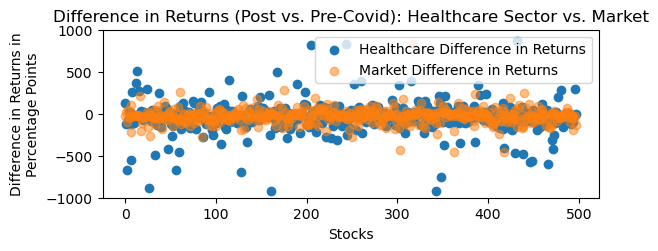

In [18]:
#scatter plot of data
plt.subplot(2, 1, 1)
plt.scatter(range(len(healthcare_sample_set['Symbol'])), healthcare_sample_set['Difference in Returns'], label="Healthcare Difference in Returns")
plt.scatter(range(len(market_df['Symbol'])), market_df['Difference in Returns'], label="Market Difference in Returns", alpha = 0.5)
plt.legend()
plt.title('Difference in Returns (Post vs. Pre-Covid): Healthcare Sector vs. Market')
plt.ylim(-1000,1000)
plt.xlabel('Stocks')
plt.ylabel("\n".join(wrap("Difference in Returns in Percentage Points", 30)))
plt.savefig("Healthcare_Market_Scatter_Diff_in_Diff.png")

###### It can be observed that there is a lot more variation in healthcare data points, than in market. 

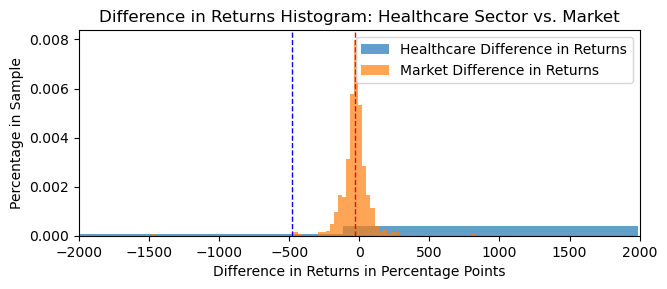

In [21]:
#plotting a histogram
plt.subplot(2, 1, 2)
plt.hist(healthcare_sample_set['Difference in Returns'], 100, density=True, alpha=0.7, label="Healthcare Difference in Returns")
plt.hist(market_df['Difference in Returns'], 80, density=True, alpha=0.7, label="Market Difference in Returns")
plt.axvline(healthcare_sample_set['Difference in Returns'].mean(), color='blue', linestyle='dashed', linewidth=1)
plt.axvline(market_df['Difference in Returns'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.legend()  
plt.tight_layout()
plt.xlim(-2000,2000)
plt.ylabel('Percentage in Sample')
plt.xlabel("\n".join(wrap("Difference in Returns in Percentage Points", 60)))
plt.title('Difference in Returns Histogram: Healthcare Sector vs. Market')
plt.savefig("Healthcare_Market_Histogram_Diff_in_Diff.png")

### Difference in market returns mostly gather around 0 percentage points, where as healthcare difference in returns vary greatly and are spread across different values

###### Null Hypothesis: µ(returns of healthcare post covid) - µ(returns of healthcare pre covid) =  µ(returns of market post covid) - µ(returns of market pre covid)


###### Alternative Hypothesis: µ(returns of healthcare post covid) - µ(returns of healthcare pre covid) ≠   µ(returns of market post covid) - µ(returns of market pre covid)


In [38]:
#running a two-sample diff-in-diff t-test
# Note: Setting equal_var=False performs Welch's t-test which does 
# not assume equal population variance
st.ttest_ind(healthcare_sample_set['Difference in Returns'], market_df['Difference in Returns'], equal_var=False)

Ttest_indResult(statistic=-1.0773971070380404, pvalue=0.2818254083998124)

##### The p value is ~0.28 which is not significant at any standard level, therefore we fail to reject the null. This implies that the impact of COVID-19 on healthcare sector returns is not significantly different than the impact on the rest of the market. 